### Requirements needed
1. pandas
2. numpy
3. scikit-learn
4. nltk
5. matplotlib
6. seaborn
7. wordcloud

In [75]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# load train and test data
train_df =pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Display the few rows of the dataframe
train_df.sample(5)  
train_df.head(10)

,ID,Text,Subject
0,train_00001,"Its ""duet"" feature allows users to film a vide...",Pop Culture
1,train_00002,"*@**%%@ To support this, Blizzard released the...",Gaming
2,train_00003,"James Mitchell, the Premier of Western Austral...",History
3,train_00004,Pharo has an implementation of a heap in the C...,Computer Sciences
4,train_00005,"a for Tour, Alberto his his possible allowed m...",Sports
5,train_00006,"In 1961, the U.S. had 50,000 troops based in S...",History
6,train_00007,"And so well thought out, and so beautiful and ...",Pop Culture
7,train_00008,Bundesliga (although it is rarely referred to ...,Sports
8,train_00009,The lifecycle analysis of EVs shows that even ...,Pop Culture
9,train_00010,"Software interrupts may be error conditions, s...",Computer Sciences


In [12]:
train_df.shape  # Display the shape of the dataframe

(10000, 3)

In [ ]:
# check the data types of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10000 non-null  object
 1   Text     10000 non-null  object
 2   Subject  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [ ]:
# Check for missing values in the train dataframe
train_df.isnull().sum()  

ID         0
Text       0
Subject    0
dtype: int64

In [ ]:
# Check for missing values in the test dataframe
test_df.isnull().sum()  

ID      0
Text    0
dtype: int64

In [ ]:
# Display the summary statistics of the train dataframe
train_df.describe() 

,ID,Text,Subject
count,10000,10000,10000
unique,10000,9942,7
top,train_09984,The first attack wave of 183 planes was launch...,Sports
freq,1,2,2210


In [ ]:
# Display the summary statistics of the test dataframe
test_df.describe()  

,ID,Text
count,4020,4020
unique,4020,4010
top,test_4020,The Jacobin cause was picked up by Marxists in...
freq,1,2


### Data cleaning and preprocessing

In [ ]:
# Basic cleaning
def clean_text(text):
    if pd.isna(text):
        return ""
    text =str(text).lower()  # Convert to lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-alphabetic characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()  # Remove leading and trailing spaces



In [ ]:
# Apply the cleaning function to the 'Text' column in both train and test dataframes
train_df['text_cleaned'] = train_df['Text'].apply(clean_text)
test_df['text_cleaned'] = test_df['Text'].apply(clean_text)

In [37]:
train_df.head(10)

,ID,Text,Subject,text_cleaned
0,train_00001,"Its ""duet"" feature allows users to film a vide...",Pop Culture,its duet feature allows users to film a video ...
1,train_00002,"*@**%%@ To support this, Blizzard released the...",Gaming,to support this blizzard released the hero ref...
2,train_00003,"James Mitchell, the Premier of Western Austral...",History,james mitchell the premier of western australi...
3,train_00004,Pharo has an implementation of a heap in the C...,Computer Sciences,pharo has an implementation of a heap in the c...
4,train_00005,"a for Tour, Alberto his his possible allowed m...",Sports,a for tour alberto his his possible allowed mi...
5,train_00006,"In 1961, the U.S. had 50,000 troops based in S...",History,in the us had troops based in south korea and ...
6,train_00007,"And so well thought out, and so beautiful and ...",Pop Culture,and so well thought out and so beautiful and s...
7,train_00008,Bundesliga (although it is rarely referred to ...,Sports,bundesliga although it is rarely referred to w...
8,train_00009,The lifecycle analysis of EVs shows that even ...,Pop Culture,the lifecycle analysis of evs shows that even ...
9,train_00010,"Software interrupts may be error conditions, s...",Computer Sciences,software interrupts may be error conditions su...


In [ ]:
# encode labels
le = LabelEncoder()
y = le.fit_transform(train_df['Subject'])

In [43]:
train_df.head(10)

,ID,Text,Subject,text_cleaned
0,train_00001,"Its ""duet"" feature allows users to film a vide...",Pop Culture,its duet feature allows users to film a video ...
1,train_00002,"*@**%%@ To support this, Blizzard released the...",Gaming,to support this blizzard released the hero ref...
2,train_00003,"James Mitchell, the Premier of Western Austral...",History,james mitchell the premier of western australi...
3,train_00004,Pharo has an implementation of a heap in the C...,Computer Sciences,pharo has an implementation of a heap in the c...
4,train_00005,"a for Tour, Alberto his his possible allowed m...",Sports,a for tour alberto his his possible allowed mi...
5,train_00006,"In 1961, the U.S. had 50,000 troops based in S...",History,in the us had troops based in south korea and ...
6,train_00007,"And so well thought out, and so beautiful and ...",Pop Culture,and so well thought out and so beautiful and s...
7,train_00008,Bundesliga (although it is rarely referred to ...,Sports,bundesliga although it is rarely referred to w...
8,train_00009,The lifecycle analysis of EVs shows that even ...,Pop Culture,the lifecycle analysis of evs shows that even ...
9,train_00010,"Software interrupts may be error conditions, s...",Computer Sciences,software interrupts may be error conditions su...


C:\Users\Insha sadaf\AppData\Local\Temp\ipykernel_35328\666972335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df['Subject'], order=train_df['Subject'].value_counts().index, palette="viridis")


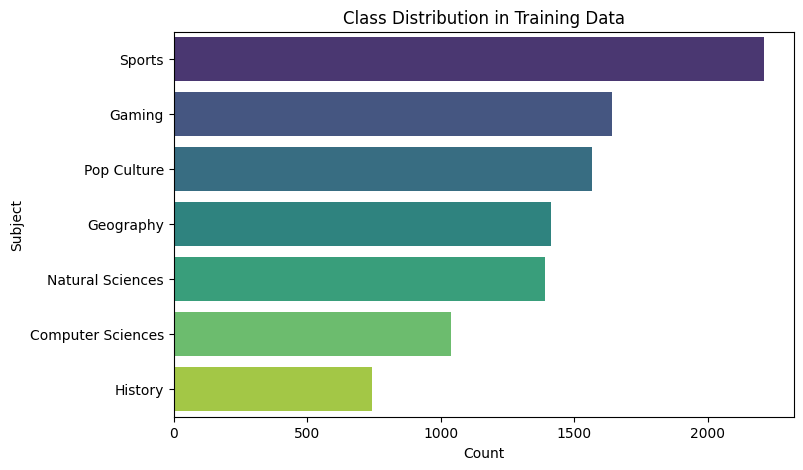

In [78]:
# Class distribution in training data
plt.figure(figsize=(8,5))
sns.countplot(y=train_df['Subject'], order=train_df['Subject'].value_counts().index, palette="viridis")
plt.title("Class Distribution in Training Data")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.show()


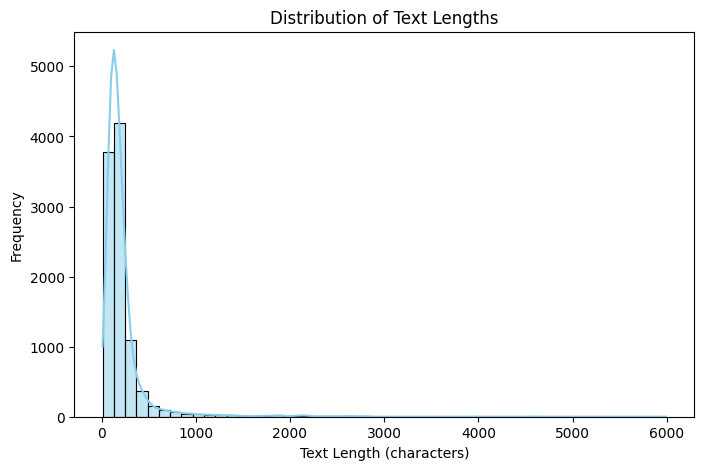

In [79]:
# Text length distribution
train_df['text_len'] = train_df['Text'].astype(str).apply(len)

plt.figure(figsize=(8,5))
sns.histplot(train_df['text_len'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()


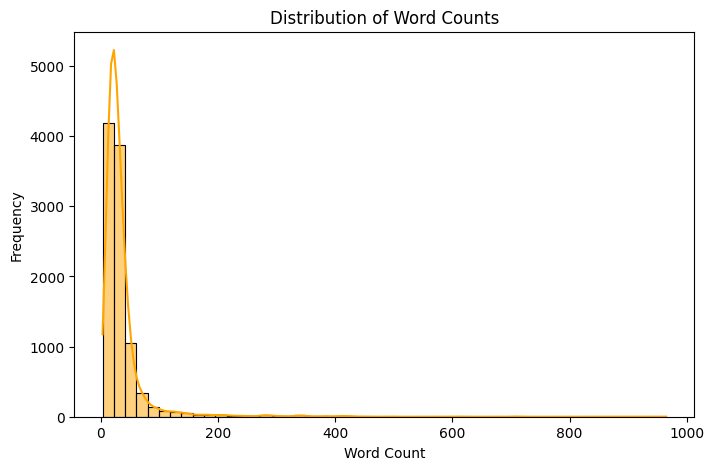

In [80]:
# Word count distribution
train_df['word_count'] = train_df['Text'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(train_df['word_count'], bins=50, kde=True, color='orange')
plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

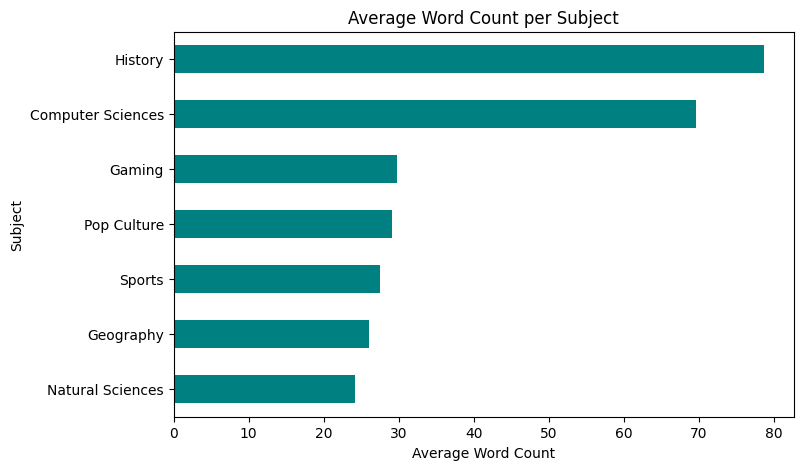

In [81]:
# Average word count per class
avg_wc = train_df.groupby('Subject')['word_count'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_wc.plot(kind='barh', color='teal')
plt.title("Average Word Count per Subject")
plt.xlabel("Average Word Count")
plt.ylabel("Subject")
plt.show()

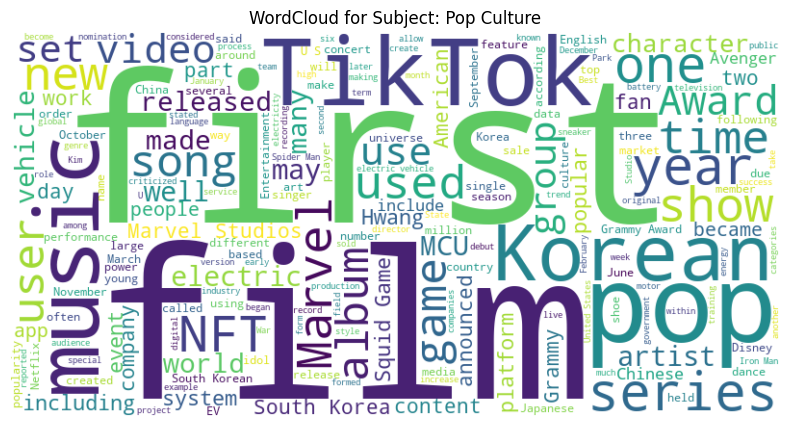

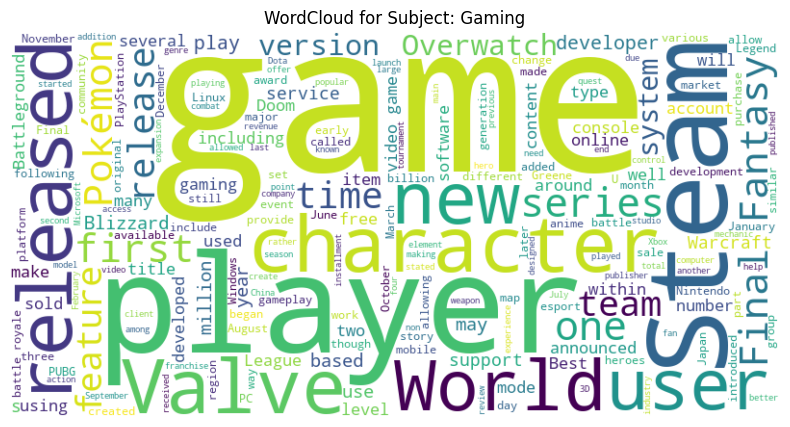

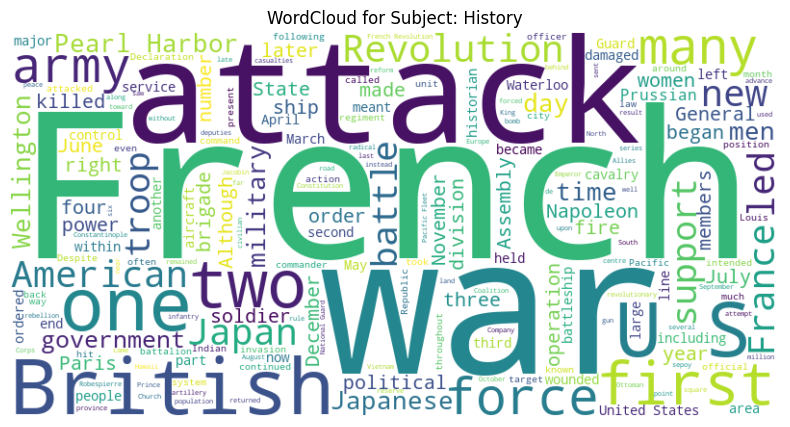

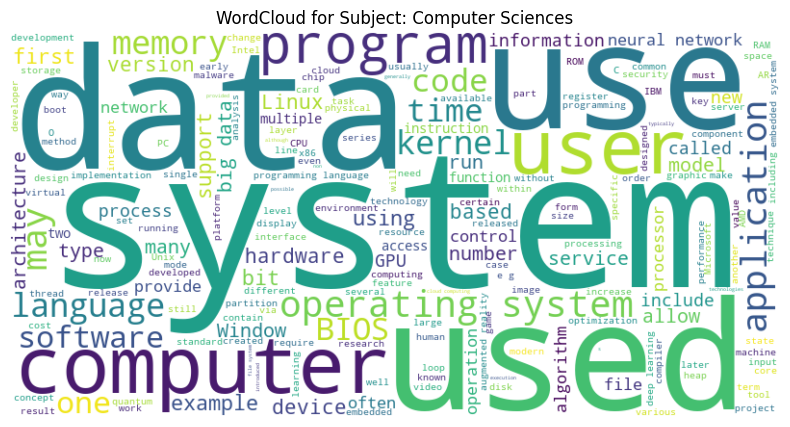

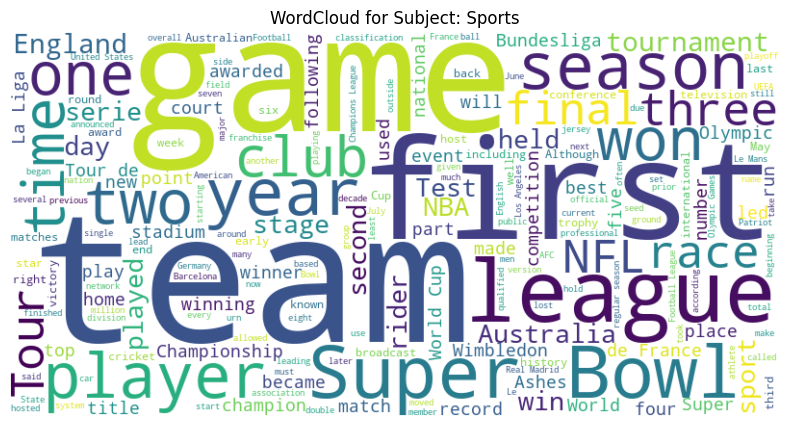

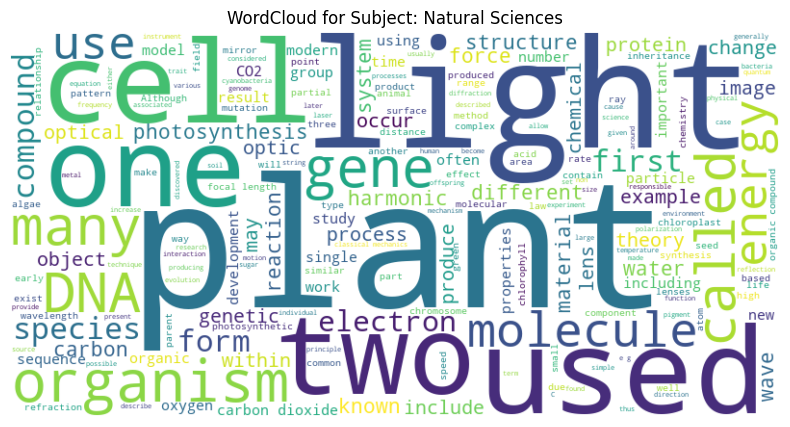

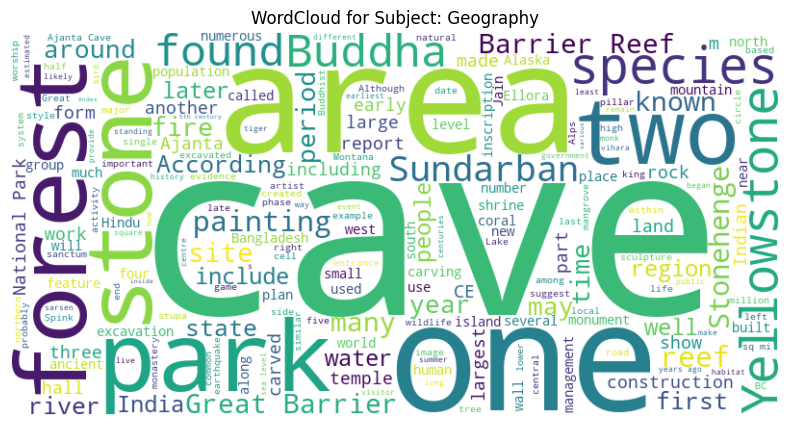

In [82]:
from wordcloud import WordCloud
for subject in train_df['Subject'].unique():
    text_data = " ".join(train_df[train_df['Subject'] == subject]['Text'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Subject: {subject}")
    plt.show()


In [ ]:
# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), min_df=3, max_df=0.9)


In [ ]:
# Logistic Regression 
clf = LogisticRegression(max_iter=2000, C=2.0, random_state=42, n_jobs=-1,solver='saga',multi_class='multinomial')

In [ ]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_preds = np.zeros(len(train_df))
test_proba = np.zeros((len(test_df),len(le.classes_)))


In [55]:
# cross -validation
for fold, (tr_idx, val_idx) in enumerate(skf.split(train_df['text_cleaned'], y), 1):
    print(f"Fold {fold } trianing...")
    
    X_train = tfidf.fit_transform(train_df['text_cleaned'].iloc[tr_idx])
    X_val = tfidf.transform(train_df['text_cleaned'].iloc[val_idx])
    y_tr, y_val = y[tr_idx], y[val_idx]
    
    clf.fit(X_train, y_tr)
    val_pred = clf.predict(X_val)
    oof_preds[val_idx] = val_pred

    f1= f1_score(y_val, val_pred, average='macro')
    acc = accuracy_score(y_val, val_pred)
    print(f"Fold {fold} - F1 Score: {f1:.4f}, Accuracy: {acc:.4f}")
    test_proba += clf.predict_proba(tfidf.transform(test_df['text_cleaned']))

Fold 1 trianing...


e:\Project Commit\InsightGenie\Classify-sentences-into-subject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 1 - F1 Score: 0.8486, Accuracy: 0.8525
Fold 2 trianing...


e:\Project Commit\InsightGenie\Classify-sentences-into-subject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 2 - F1 Score: 0.8415, Accuracy: 0.8440
Fold 3 trianing...


e:\Project Commit\InsightGenie\Classify-sentences-into-subject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 3 - F1 Score: 0.8451, Accuracy: 0.8445
Fold 4 trianing...


e:\Project Commit\InsightGenie\Classify-sentences-into-subject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 4 - F1 Score: 0.8507, Accuracy: 0.8515
Fold 5 trianing...


e:\Project Commit\InsightGenie\Classify-sentences-into-subject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 5 - F1 Score: 0.8534, Accuracy: 0.8515


In [56]:
# cv metrics
print("Overall F1 Score:", f1_score(y, oof_preds, average='macro'))
print("Overall Accuracy:", accuracy_score(y, oof_preds))

Overall F1 Score: 0.847834941939618
Overall Accuracy: 0.8488


In [57]:
# Final training on all data
final_tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), min_df=3, max_df=0.9,)
X_full=final_tfidf.fit_transform(train_df['text_cleaned'])
final_clf =clf = LogisticRegression(max_iter=2000, C=2.0, random_state=42, n_jobs=-1,solver='saga',multi_class='multinomial')
final_clf.fit(X_full, y)

e:\Project Commit\InsightGenie\Classify-sentences-into-subject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,2.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'saga'
,max_iter,2000
,multi_class,'multinomial'


In [64]:
# Accuracy and f1 on full training data
train_preds_full = final_clf.predict(X_full)
train_acc_full = accuracy_score(y, train_preds_full)
train_f1_full = f1_score(y, train_preds_full, average='macro')
print("Final Training accuracy:", train_acc_full)
print("Final Training F1 Score:", train_f1_full)

Final Training accuracy: 0.956
Final Training F1 Score: 0.9560541948405173


In [58]:
# predict on test data
test_preds = np.argmax(test_proba/5, axis=1)
test_labels = le.inverse_transform(test_preds)


In [69]:
# save submission
submission = pd.DataFrame({'ID': test_df['ID'], 'Subject': test_labels})
submission.to_csv('submission.csv', index=False)
print("Submission saved successfully!")    

Submission saved successfully!


In [70]:
# Load the submission file to check the first few rows
sub = pd.read_csv('submission.csv')
sub.head(10)

,ID,Subject
0,test_0001,Gaming
1,test_0002,Pop Culture
2,test_0003,Computer Sciences
3,test_0004,Geography
4,test_0005,Pop Culture
5,test_0006,Pop Culture
6,test_0007,Natural Sciences
7,test_0008,Geography
8,test_0009,Sports
9,test_0010,Sports


In [71]:
# save the model and vectorizer
joblib.dump(final_clf, 'final_model.joblib')
joblib.dump(final_tfidf, 'final_tfidf.joblib')
joblib.dump(le, 'label_encoder.joblib') 
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
